In [1]:
# add dimensions morphometric measurments of cells, like cell area as another dimension when you redo part 5, add other morphometric measurements

In [1]:
import pandas as pd
from ot import sliced

In [3]:
from _5_WSI_RIM_Tabulation import return_results

nonechucks may not work properly with this version of PyTorch (1.6.0). It has only been tested on PyTorch versions 1.0, 1.1, and 1.2


In [1]:
! ls prelim_out_dir 

    138     138    3198


In [2]:
import glob
stats={f:pd.read_pickle(f) for f in glob.glob("prelim_out_dir/*.pkl")}

In [3]:
len(stats)

97

In [4]:
stat=stats[glob.glob("prelim_out_dir/*.pkl")[0]]

In [5]:
stat

{'uro_decision': array([[ -1.5690453,  -2.757875 ,   6.88647  ,  -1.4076269],
        [ -5.3489175,   3.705635 ,  12.668588 , -10.597857 ],
        [ -0.9304378,  -1.5276445,   7.8999405,  -4.4308925],
        ...,
        [ -3.836098 ,   2.5416143,  11.346553 ,  -9.343971 ],
        [ -2.5726178,   3.1220338,   4.7625237,  -5.1086607],
        [ -1.6059004,   1.7197387,   4.466683 ,  -4.078851 ]],
       dtype=float32),
 'atypia': array([0.10978176, 0.02656866, 0.9388781 , ..., 0.08372055, 0.02642288,
        0.09493784], dtype=float32),
 'nc':              0        1      2
 0      20960.0  44576.0    0.0
 1      48173.0  17363.0    0.0
 2      21267.0  44269.0    0.0
 3      31871.0  33665.0    0.0
 4      22231.0  43305.0    0.0
 ...        ...      ...    ...
 81467  28711.0  36438.0  387.0
 81468  27439.0  38097.0    0.0
 81469  62354.0   3182.0    0.0
 81470  24780.0  40756.0    0.0
 81471  39334.0  26202.0    0.0
 
 [81472 rows x 3 columns],
 'cell_stats':        area  bbox_are

In [17]:
from scipy.special import softmax
def edit_stats(stat):
    stats2={}
    include=softmax(stat['uro_decision'],1).argmax(1)==0#[:,0]>0.99#
    stats2['nc_ratio']=(stat['nc'][2]/(stat['nc'][2]+stat['nc'][1]))[include]
    stats2['atypia']=stat['atypia'][include]
    return pd.concat([pd.DataFrame(stats2),stat['cell_stats'].loc[include]],axis=1)

In [18]:
stats2={k:edit_stats(stats[k]) for k in stats}

In [20]:
stats3=pd.DataFrame()
for k in stats2:
    stat=stats2[k]
    stat['slide']=k
    stats3=pd.concat([stats3,stat],axis=0)

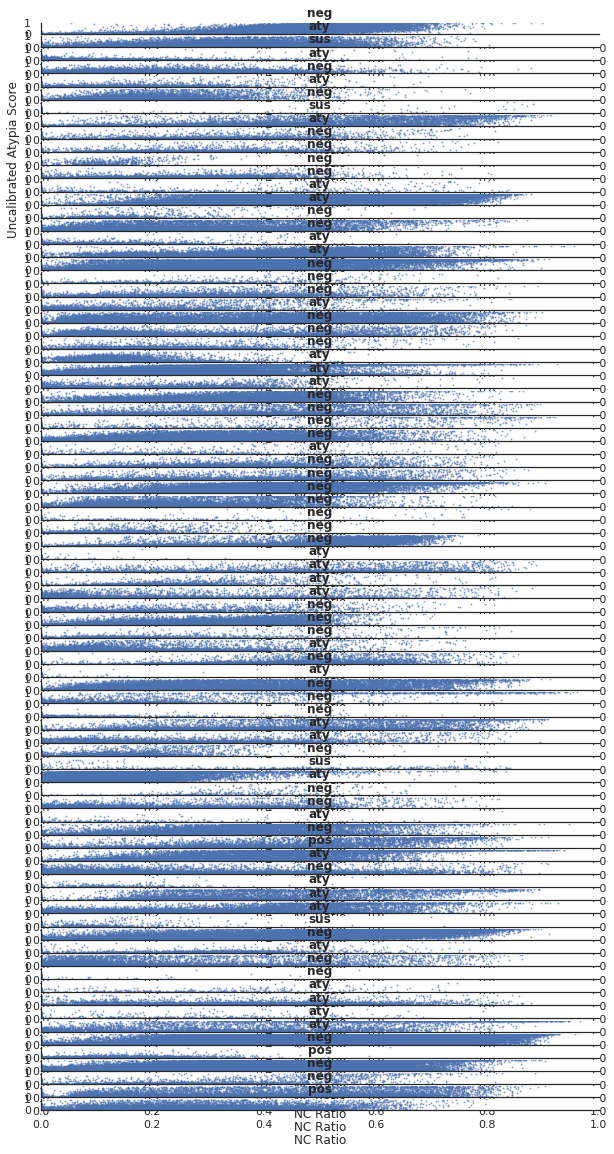

In [19]:
import matplotlib.pyplot as plt, matplotlib, seaborn as sns
import os
matplotlib.rcParams['figure.dpi']=300
sns.set(style='white')
%matplotlib inline
plt.figure(figsize=(10,20))
labeler=lambda f: os.path.basename(f).split("_")[0]

# fig, axes = plt.subplots(ncols=2, nrows=len(stats), constrained_layout=True)
for i,k in enumerate(list(stats2.keys())):
    nc_ratio,atypia_score=stats2[k].values[:,:2].T.tolist()
#     plt.sca(axes[i,0])
    plt.subplot(len(stats2),1,(i+1))
#     h = sns.jointplot(nc_ratio,atypia_score,kind='hex')#,xlim=[0,4])
#     h.set_axis_labels('x', 'y', fontsize=16)
#     plt.suptitle(k, fontweight='bold')#os.path.basename(wsi_file).split(".")[0]
#     h.ax_joint.set_xlabel('NC Ratio', fontweight='bold')
#     h.ax_joint.set_ylabel('Uncalibrated Atypia Score', fontweight='bold')
#     plt.sca(axes[i,1])
    plt.scatter(nc_ratio,atypia_score,s=1,alpha=0.5)
#     plt.title(k)
    plt.title(labeler(k), fontweight='bold')
    plt.xlim([0,1])
    plt.ylim([0,1])
    sns.despine()
    plt.xlabel('NC Ratio')
    if i==10:
        plt.ylabel('Uncalibrated Atypia Score')

In [24]:
stats3

,nc_ratio,atypia,area,bbox_area,convex_area,eccentricity,equivalent_diameter,euler_number,extent,feret_diameter_max,filled_area,label,major_axis_length,minor_axis_length,orientation,perimeter,perimeter_crofton,solidity,slide
75,0.100539,0.103013,1609,2752,1975,0.820316,45.261931,1,0.584666,66.098411,1609,76,63.267462,36.183317,0.232528,216.237590,209.421065,0.814684,prelim_out_dir/neg_40_5_13_N_orig.pkl
200,0.236238,0.047731,1628,2816,2033,0.657322,45.528387,1,0.578125,64.938432,1628,201,55.179801,41.584038,-0.033956,283.764502,282.107880,0.800787,prelim_out_dir/neg_40_5_13_N_orig.pkl
205,0.113897,0.165939,815,1927,1173,0.934993,32.213200,1,0.422937,55.217751,815,206,62.408810,22.134351,-0.696940,196.994949,193.696754,0.694800,prelim_out_dir/neg_40_5_13_N_orig.pkl
217,0.265508,0.089806,947,1892,1191,0.321892,34.724024,1,0.500529,46.818800,947,218,41.067166,38.881426,-1.004079,174.888348,171.919295,0.795130,prelim_out_dir/neg_40_5_13_N_orig.pkl
227,0.000000,0.101168,1094,1890,1324,0.863927,37.321898,1,0.578836,52.009614,1094,228,56.080167,28.242964,0.908525,187.509668,185.422165,0.826284,prelim_out_dir/neg_40_5_13_N_orig.pkl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88344,0.057285,0.037762,2295,4331,2706,0.840081,54.056311,1,0.529901,74.946648,2295,88345,75.540594,40.977867,-1.132503,284.042677,298.657058,0.848115,prelim_out_dir/pos_127_16_14_R_orig.pkl
88359,0.000000,0.027242,861,1326,974,0.630165,33.109806,1,0.649321,42.154478,861,88360,38.199787,29.660650,-0.470485,143.539105,161.653302,0.883984,prelim_out_dir/pos_127_16_14_R_orig.pkl
88383,0.193320,0.048853,6871,12402,7922,0.683774,93.533036,1,0.554024,118.067777,6871,88384,116.736363,85.181765,-1.152480,423.031529,409.726327,0.867331,prelim_out_dir/pos_127_16_14_R_orig.pkl
88391,0.064948,0.054237,1965,3185,2247,0.844800,50.019153,1,0.616954,68.029405,1965,88392,70.366305,37.651765,-0.421512,231.421356,225.779674,0.874499,prelim_out_dir/pos_127_16_14_R_orig.pkl


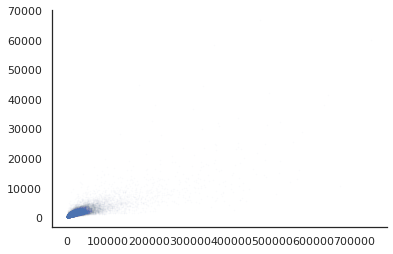

In [55]:
plt.scatter(stats3['area'],stats3['perimeter'],s=1,alpha=0.01)#equivalent_diameter
sns.despine()

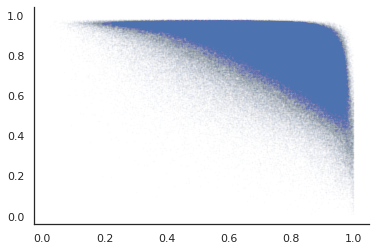

In [53]:
plt.scatter(stats3['eccentricity'],stats3['solidity'],s=1,alpha=0.01)
sns.despine()

In [50]:
# plt.scatter(stats3['nc_ratio'],stats3['extent'],s=1,alpha=0.01)
# sns.despine()

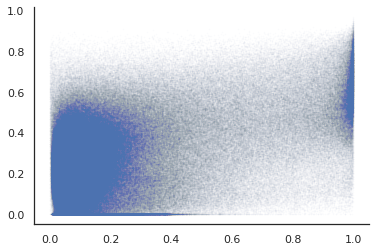

In [42]:
plt.scatter(stats3['atypia'],stats3['nc_ratio'],s=1,alpha=0.01)
sns.despine()

In [205]:
# xs,xt=list(stats.values())[0].values,list(stats.values())[1].values
# M = ot.dist(xs,xt)
# M /= M.max()

# a,b = ot.unif(len(xs)),ot.unif(len(xt))

In [ ]:
from itertools import product
import ot
import numpy as np
import tqdm
import dask, dask.diagnostics
PC=list(stats2.values())
PC_dist=(~np.eye(len(stats2)).astype(bool)).astype(float)
distances=[]
idxs=list(product(np.arange(len(stats2)),repeat=2))
for i,j in tqdm.tqdm(idxs):
#     distances.append(dask.delayed(sliced.sliced_wasserstein_distance)(PC[i], PC[j]))
    try: PC_dist[i,j]=PC_dist[j,i]=sliced.sliced_wasserstein_distance(PC[i], PC[j])
    except: PC_dist[i,j]=PC_dist[j,i]=np.nan
# with dask.diagnostics.ProgressBar():
#     PC_dist2=dask.compute(*distances,scheduler='processes')


 43%|████▎     | 2629/6084 [00:30<01:23, 41.42it/s] 

In [176]:
# for (i,j),d in zip(idxs,distances):
#     print(d[0])
#     PC_dist[i,j]=PC_dist[j,i]=d

In [177]:
stats.keys()

dict_keys(['prelim_out_dir/neg_40_5_13_N_orig.pkl', 'prelim_out_dir/aty_12_5_13_R_orig.pkl', 'prelim_out_dir/sus_102_1_08_R_orig.pkl', 'prelim_out_dir/aty_0_12_16_R_orig.pkl', 'prelim_out_dir/neg_23_7_15_N_orig.pkl', 'prelim_out_dir/aty_31_9_14_N_orig.pkl', 'prelim_out_dir/neg_137_1_08_N_orig.pkl', 'prelim_out_dir/sus_17_0_12_R_orig.pkl', 'prelim_out_dir/aty_0_13_16_R_orig.pkl', 'prelim_out_dir/neg_37_15_18_R_orig.pkl', 'prelim_out_dir/neg_51_2_11_R_orig.pkl', 'prelim_out_dir/neg_4_1_13_N_orig.pkl', 'prelim_out_dir/aty_12_2_12_R_orig.pkl', 'prelim_out_dir/aty_30_6_15_N_orig.pkl', 'prelim_out_dir/neg_2_13_17_N_orig.pkl', 'prelim_out_dir/neg_20_0_14_N_orig.pkl', 'prelim_out_dir/aty_103_28_17_R_orig.pkl', 'prelim_out_dir/aty_5_7_15_R_orig.pkl', 'prelim_out_dir/neg_2_10_16_N_orig.pkl', 'prelim_out_dir/neg_37_14_17_R_orig.pkl', 'prelim_out_dir/neg_70_12_14_N_orig.pkl', 'prelim_out_dir/neg_23_10_17_N_orig.pkl', 'prelim_out_dir/neg_6_1_14_N_orig.pkl', 'prelim_out_dir/neg_33_2_15_N_orig.pkl', 

In [178]:
PC_dist

array([[0.        , 0.13525455, 0.39385649, ..., 0.08123157, 0.09230443,
        0.11981163],
       [0.13525455, 0.        , 0.25981615, ..., 0.11110038, 0.07718247,
        0.04129334],
       [0.39385649, 0.25981615, 0.        , ..., 0.35911746, 0.30989508,
        0.27745429],
       ...,
       [0.08123157, 0.11110038, 0.35911746, ..., 0.        , 0.07968552,
        0.09780833],
       [0.09230443, 0.07718247, 0.30989508, ..., 0.07968552, 0.        ,
        0.05408315],
       [0.11981163, 0.04129334, 0.27745429, ..., 0.09780833, 0.05408315,
        0.        ]])

In [179]:
df.columns.value_counts()

benign       37
malignant    31
dtype: int64

In [180]:
! ls example_full_scans/*.npy | wc

    119     119    5009


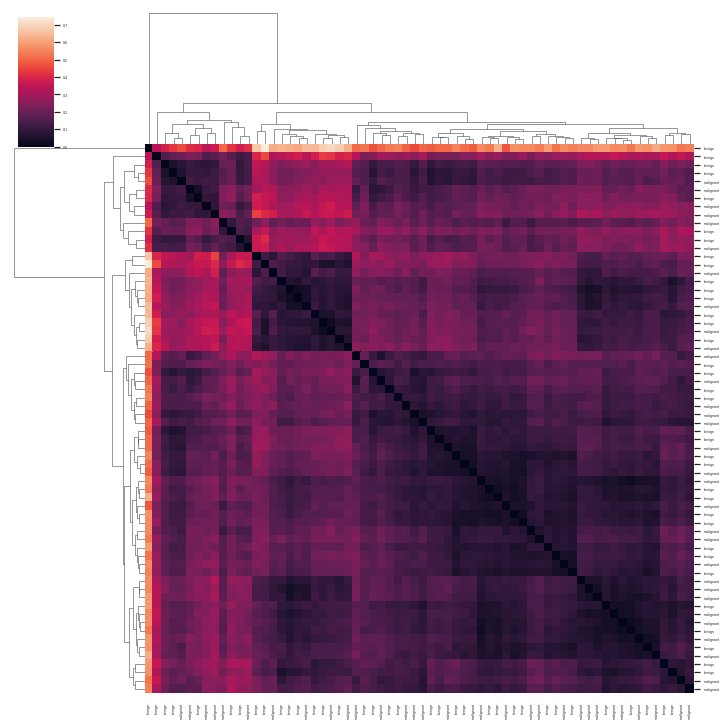

In [181]:
import os
keys=list(stats2.keys())
sns.set(font_scale=0.3)
df=pd.DataFrame(PC_dist,columns=map(labeler,keys),index=map(labeler,keys)).dropna(how='all').T.dropna(how='all').T#.fillna(1)
# print(df)
df=df.loc[df.index.isin(['neg','aty']),df.columns.isin(['neg','aty'])]#.loc[filter(lambda x: x in ["neg",'aty']),filter(lambda x: x in ["neg",'aty'])]
df=df.rename(columns=dict(neg='benign',aty='malignant',sus='malignant',pos='malignant'),index=dict(neg='benign',aty='malignant',sus='malignant',pos='malignant'))
# sns.clustermap(df.loc[df.index.isin(['neg','aty']),df.columns.isin(['neg','aty'])])
sns.clustermap(df)



In [182]:
from sklearn import svm

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
df.columns

Index(['benign', 'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'benign', 'benign'],
      dtype='object')

In [199]:
clf = svm.SVC(kernel='precomputed', C=0.01)#kernel='precomputed',
scores = cross_val_score(clf, 1-df.values/df.values[:,:2].max(),(df.columns=="malignant") , cv=5, scoring='roc_auc')

In [200]:
print(scores)

[0.73469388 0.38095238 0.26190476 0.30952381 0.33333333]


In [201]:
scores.mean()

0.4040816326530612

In [127]:
# emd=ot.emd(a,b,M)


In [8]:
d=sliced.sliced_wasserstein_distance(xs, xt)

In [9]:
d

0.37258293222517275

In [4]:
! pip install git+https://github.com/PythonOT/POT.git --upgrade --no-deps

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/PythonOT/POT.git to /scratch/pip-req-build-fkiauzw9
  Running command git clone -q https://github.com/PythonOT/POT.git /scratch/pip-req-build-fkiauzw9
  Created wheel for POT: filename=POT-0.7.0-cp37-cp37m-linux_x86_64.whl size=337284 sha256=5516576eac617204a84c54f0583e138fd189d63d6c5375f668e283ed118107f3
  Stored in directory: /scratch/pip-ephem-wheel-cache-wmrackyi/wheels/f3/7e/e1/600f1f41cb0e719ed0cd43125c8a457080f35d34eb8ff3d135
Successfully built POT
  Attempting uninstall: POT
    Found existing installation: POT 0.7.0
    Uninstalling POT-0.7.0:
      Successfully uninstalled POT-0.7.0
